In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

font = {'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

def get_cumr_T(T_alpha, T, r_explor, r_exploit):
    r = np.zeros(T)
    r[:T_alpha] = r_explor
    r[T_alpha:] = r_exploit
    r = np.cumsum(r)
    return r

tot_seeds = 100
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.67, 0.7, 0.8, 0.9, 1]
colors = {0.4: 'b', 0.5: 'c', 0.6: 'm', 0.67: 'green', 0.7: 'k', 0.8: 'orange', 0.9: 'r', 1: 'gray',\
          0.1: 'cyan', 0.2: 'pink', 0.3: 'brown'}

markers = {0.1:'s', 0.2:'P', 0.3:'*', 0.4:'X', 0.5:'v', 0.6:'^', 0.7:'<', 0.8:'>', 0.9:'p', 1.0:'D', 0.67:'o'}
index = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.67]

"""
for i in range(nalpha):
    alpha = index[i]
"""

n = 6039  # NOTE: can change
k = 18  # NOTE: can change

_______c=0.05555555555555555_A_choice=0_______


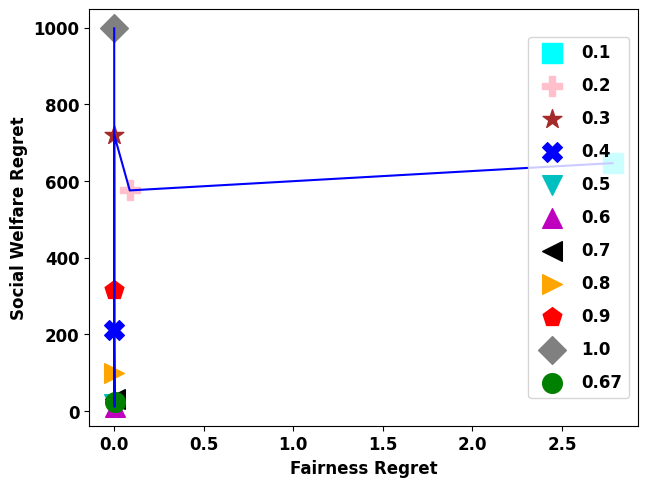

In [2]:
c_idx = '0'
c_list = [0.05555555555555555]
A_list = [0]

values_x = {}
values_y = {}

fldr = f'../../ef/logs_ef_mlens'

folder = f"{fldr}/{n}_{k}/{c_idx}"
nalpha = len(alpha_list)
for T in [100000]:
    t = np.arange(1, T+1)
    t_2_3 = (t**0.67)*np.sqrt(np.log(t))
    for c in c_list:
        save_as = f"{folder}/{c}"
        for A_choice in A_list:
            print(f"_______c={c}_A_choice={A_choice}_______")
            sws = {}
            frs = {}
            
            for alpha in alpha_list:
                sws[alpha] = np.zeros((tot_seeds, T))
                frs[alpha] = np.zeros((tot_seeds, T))
                for seed in range(1, tot_seeds+1):
                    df = pd.read_csv(f"{save_as}/{float(alpha)}_{T}_{A_choice}_{seed}/logs.csv",  delimiter='\t', header=None)
                    T_alpha = int(df.iloc[0, -1].split(', ')[-1])
                    swr_explor = float(df.iloc[1, :].item().split(', ')[-2])
                    fr_explor = float(df.iloc[1, :].item().split(', ')[-1])
                    
                    swr_exploit = float(df.iloc[2, :].item().split(', ')[-2])
                    fr_exploit = float(df.iloc[2, :].item().split(', ')[-1])
                    
                    frs[alpha][seed-1] = get_cumr_T(T_alpha, T, fr_explor, fr_exploit)
                    sws[alpha][seed-1] = get_cumr_T(T_alpha, T, swr_explor, swr_exploit)
            
            plt.clf()
            for i in range(nalpha):
                alpha = index[i]
                marker = markers[alpha]
                color = colors[alpha]
                fr = (frs[alpha]/T).mean(0)[-1]
                swr = (sws[alpha]/T).mean(0)[-1]
                plt.scatter(fr, swr, label=index[i], s=200, marker=marker, c=color)
                values_x[alpha] = fr
                values_y[alpha] = swr

            values_x = [values_x[0.1], values_x[0.2], values_x[0.3], values_x[0.4], values_x[0.5], values_x[0.6], \
                        values_x[0.67], values_x[0.7], values_x[0.8], values_x[0.9], values_x[1.0]]
            values_y = [values_y[0.1], values_y[0.2], values_y[0.3], values_y[0.4], values_y[0.5], values_y[0.6], \
                        values_y[0.67], values_y[0.7], values_y[0.8], values_y[0.9], values_y[1.0]]
            
            plt.plot(values_x[::-1], values_y[::-1], c='blue')
            # plt.grid(True, alpha=0.15)
            plt.tight_layout()
            plt.legend(labelspacing = 0.9, loc='right')
            plt.ylabel('Social Welfare Regret', fontweight='bold')
            plt.xlabel('Fairness Regret', fontweight='bold')
            plt.savefig(f"oct8-ef-mlens.jpg", bbox_inches = 'tight', pad_inches = 0.1)
            plt.show()